# Data cleaning
> 머신러닝을 제대로 하기 위해서는 데이터가 완결성,유일성,통일성의 특징을 가져야 합니다.
- 완결성 
> 결측치 제거

- 유일성
> 중복데이터 제거

- 통일성
> 이상치 제거, 데이터 단위 통일

In [1]:
#데이터 분석 라이브러리
import pandas as pd
import numpy as np

In [2]:
#시각화용 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
global_font = {'family':'D2Coding','size' : 12 , 'weight':'bold'}

#폰트 설정
mpl.rc('font',**global_font)

#유니코드에서 음수 부호 설정
mpl.rc('axes',unicode_minus=False)

#주피터 내부에 그림 표시 (magic명령)
%matplotlib inline

## 데이터 확인

In [4]:
%cd C:\\python

C:\python


In [5]:
#타이타닉 데이터 불러오기
df = pd.read_csv('datas/Titanic.csv')

In [6]:
df.shape ,df.columns

((891, 12),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [7]:
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [8]:
df

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
# passengerid 삭제
df.drop('passengerid', axis=1, inplace=True)
df.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

### 타겟 데이터 확인
> 제일 알고 싶은 데이터

In [11]:
#타겟 데이터의 분포 확인
new_survived = pd.Categorical(df['survived'])
new_survived[:5]

[0, 1, 1, 1, 0]
Categories (2, int64): [0, 1]

In [12]:
#카테고리 재정의
new_survived = new_survived.rename_categories(['Died','Survived'])   

print(new_survived[:5])
new_survived.describe()


['Died', 'Survived', 'Survived', 'Survived', 'Died']
Categories (2, object): ['Died', 'Survived']


,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


### 데이터 분리
> train data(훈련데이터)<br>
> test data(테스트데이터)

In [13]:
#머신러닝 중에 가장 많이 사용되는 모듈 sklearn 
#중에 model_selection 기능 
#중에 train_test_split을 import

from sklearn.model_selection import train_test_split

In [14]:
x = df.drop('survived', axis=1)   #survived column을 제외하고 모든 column
y = df['survived']

SEED = 42
x_tr,x_te,y_tr,y_te = train_test_split(x,y,random_state=SEED, test_size=0.2) #train : 80%, test : 20%, 랜덤하게 분리

x_tr
x_tr.reset_index(drop=False)   #drop : 기존 index를 column으로 옮길지(False) 버릴지(True)
x_te.reset_index(drop=False)

,index,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,709,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
1,439,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
2,840,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
3,720,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
4,39,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
174,433,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,7.1250,NaN,S
175,773,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.2250,NaN,C
176,25,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
177,84,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S


In [15]:
x_tr.shape , x_te.shape

((712, 10), (179, 10))

In [16]:
# survived 카테고리 재정의

new_survived = pd.Categorical(y_tr)
new_survived = new_survived.rename_categories(['Died','Survived'])
new_survived[:5]
new_survived.describe()

,counts,freqs
categories,,
Died,444,0.623596
Survived,268,0.376404


## data cleaning

### 중복데이터 처리

In [ ]:
#중복제거_ row

In [17]:
print(f'before:{df.shape}')
df.drop_duplicates(keep='first',inplace=True, ignore_index=True)
print(f'after:{df.shape}')

before:(891, 11)
after:(891, 11)


둘의 shape이 동일한 것으로 보아 중복값은 없다는 것을 알 수있다.

### 결측치 
> 값이 없는 값
- NaN : not a number(숫자가 아닌) -> 값은 있지만 기능을 할 수 없는 값
- Null : 아무것도 존재하지 않음
- undefined : 정의되지 않음

#### 결측치 탐색

##### 통계 탐색
> train data에 대해서만 탐색 !! 
>> test data 탐색 XX

In [18]:
x_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    712 non-null    int64  
 1   name      712 non-null    object 
 2   sex       712 non-null    object 
 3   age       572 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   ticket    712 non-null    object 
 7   fare      712 non-null    float64
 8   cabin     159 non-null    object 
 9   embarked  710 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 61.2+ KB


In [19]:
#전체 결측치의 수
x_tr.isnull().sum().sum()

695

In [20]:
#각 컬럼별 결측치의 수
x_tr.isnull().sum().sort_values(ascending=False) 

cabin       553
age         140
embarked      2
pclass        0
name          0
sex           0
sibsp         0
parch         0
ticket        0
fare          0
dtype: int64

In [21]:
#각 컬럼별 결측치의 비율
(x_tr.isnull().sum() / x_tr.shape[0]).round(4).sort_values(ascending=False)

cabin       0.7767
age         0.1966
embarked    0.0028
pclass      0.0000
name        0.0000
sex         0.0000
sibsp       0.0000
parch       0.0000
ticket      0.0000
fare        0.0000
dtype: float64

##### 결측치 그래프

findfont: Font family ['D2Coding'] not found. Falling back to DejaVu Sans.


<AxesSubplot:>

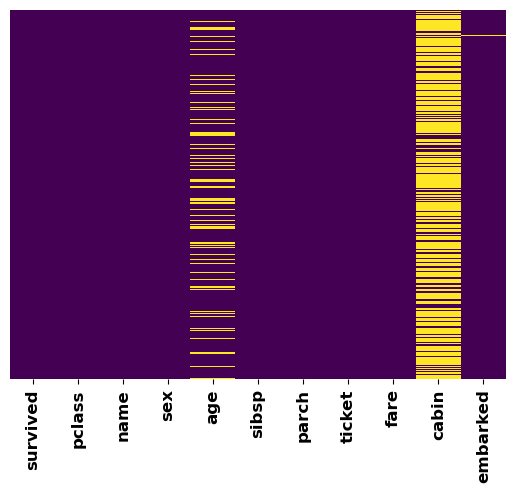

In [23]:
sns.heatmap(df.isnull(),yticklabels = False, cbar =False, cmap='viridis')

Text(0.5, 1.0, 'Total Missing Value (%)')

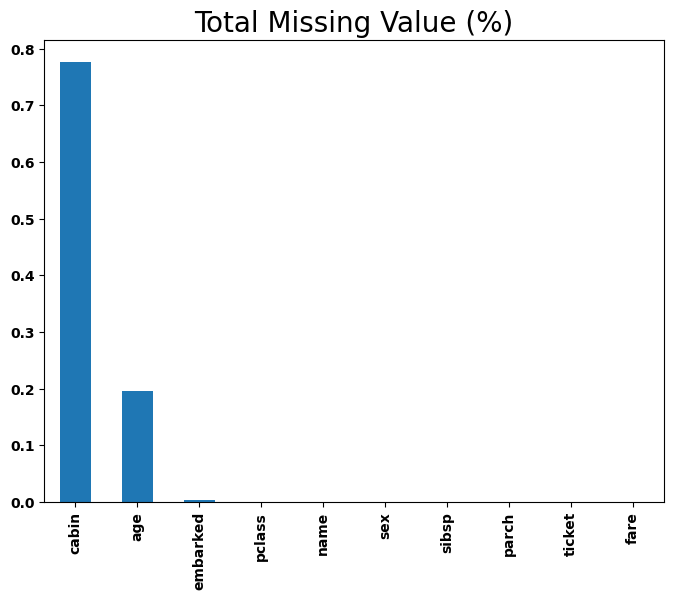

In [27]:
total = x_tr.isnull().sum().sort_values(ascending=False)
percent = (x_tr.isnull().sum()/x_tr.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)

In [28]:
# null 값이면 0, 아니면 1

x_tr['hascabin'] = x_tr['cabin'].isnull().apply(lambda x : 0 if x == True else 1)
x_tr['hasage'] = x_tr['age'].isnull().apply(lambda x : 0 if x == True else 1)

In [31]:
# 확인
x_tr[['hascabin','cabin']].head()

,hascabin,cabin
331,1,C124
733,0,NaN
382,0,NaN
704,0,NaN
813,0,NaN


findfont: Font family ['D2Coding'] not found. Falling back to DejaVu Sans.


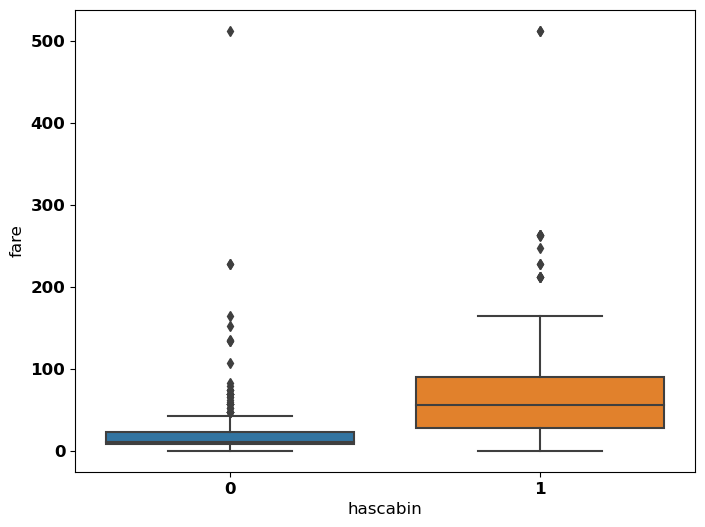

In [34]:
#결측치가 있는 데이터와 없는 데이터의 fare 비교
data = pd.concat([x_tr['fare'],x_tr['hascabin']],axis =1)
f , ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='hascabin',y='fare',data=data)

cabin 값이 있는 사람들이 fare가 높은 경향이 있다.

findfont: Font family ['D2Coding'] not found. Falling back to DejaVu Sans.


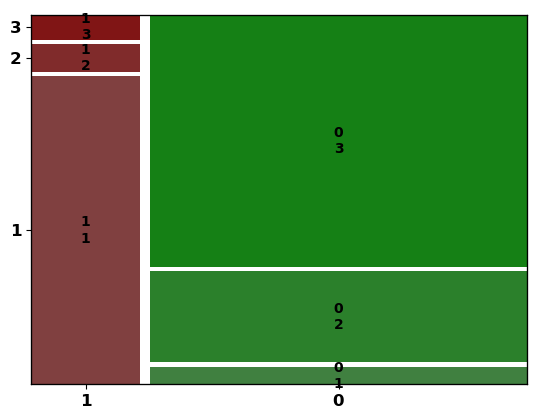

In [40]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(x_tr, ['hascabin', 'pclass'],gap=0.02)
plt.show()

pclass가 1일수록 hascabin의 값이 1인 경우가 많다.
즉 pclass가 1일수록 cabin 값이 null이 아닐 경우가 많다.

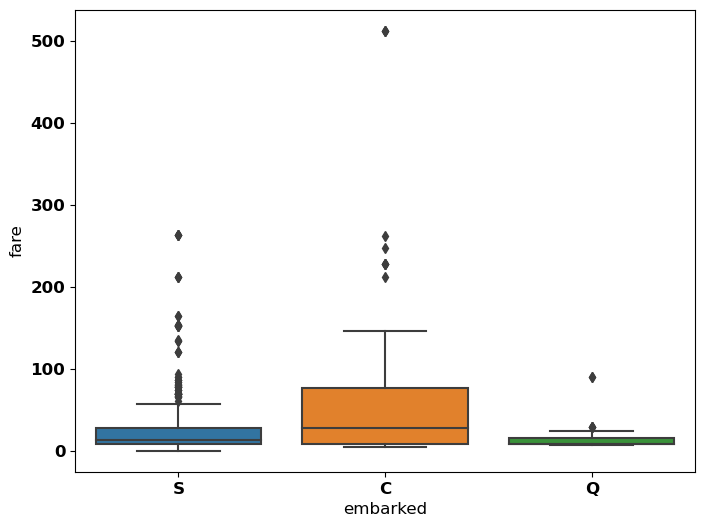

In [43]:
data = pd.concat([x_tr['fare'],x_tr['embarked']],axis=1)
f , ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=x_tr['embarked'],y=x_tr['fare'])

embarked가  C > S > Q 순으로 fare가 높은 경향이 있다.


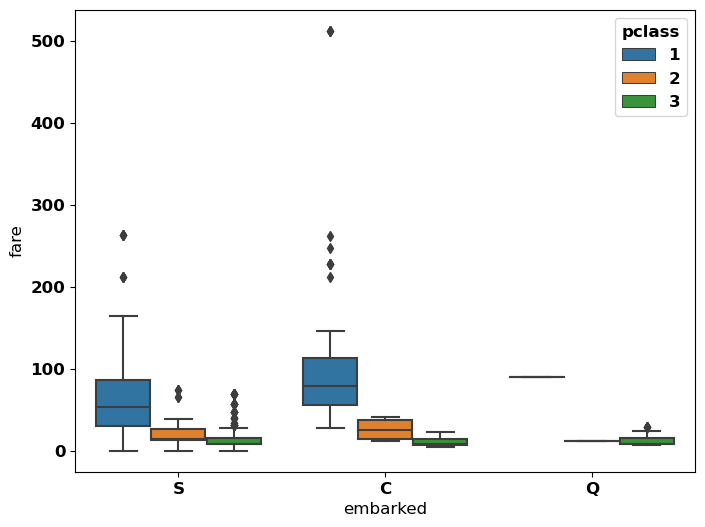

In [44]:
f , ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=x_tr['embarked'],y=x_tr['fare'],hue=x_tr['pclass'])

위 그래프를 보면 embarked(C > S > Q)와 pclass (1 > 2 > 3)을 같이 적용하면, 더욱더 fare가 높은 경향을 보인다.

embarked가 Q에는 pclass 3외에는 존재 X pclass 결측치를 3으로 대체하면 좋을 듯 하다.

#### 결측치 처리
- df.dropna() 
> axis=0 : row삭제 // axis=1 : column 삭제<br>
> df[['column']].dropna(axis=1) : column 삭제<br>
> df.dropna(subset=['원하는 행']) : 원하는 행의 결측값이 있는 부분을 기준으로 row 삭제

- df.fillna()
> df[['column']].fillna(원하는 값) : 원하는 값으로 채우기

- df.replace
> list_df.replace(np.nan, 원하는 값) : 결측값을 원하는 값으로 변경<br>
> df[['column']].replace({'column명' : 원하는 값},{'column명': 원하는 값})

#### pandas 사용

##### 제거
> 크게 권하지 않는 방법

In [47]:
print(f'before: {x_tr.shape}')

#결측치 행 제거
df_droprows = x_tr.dropna(axis=0)
print(f'after: {df_droprows.shape}')

before: (712, 12)
after: (143, 12)


In [51]:
print(f'before: {x_tr.shape} / isnull().sum(): {x_tr.isnull().sum().sum()}')

#결측치 열 제거
df_dropcols = x_tr.dropna(axis=1)
print(f'after: {df_dropcols.shape} / isnull().sum(): {df_dropcols.isnull().sum().sum()}')


before: (712, 12) / isnull().sum(): 695
after: (712, 9) / isnull().sum(): 0


##### 치환

##### 수치형 치환

평균값 치환

In [53]:
x_tr['age_mean'] = x_tr['age'].fillna(x_tr['age'].mean())

중앙값 치환

In [54]:
x_tr['age_median'] = x_tr['age'].fillna(x_tr['age'].median())

In [55]:
x_tr[['age_mean','age_median']].isnull().sum().sum()

0

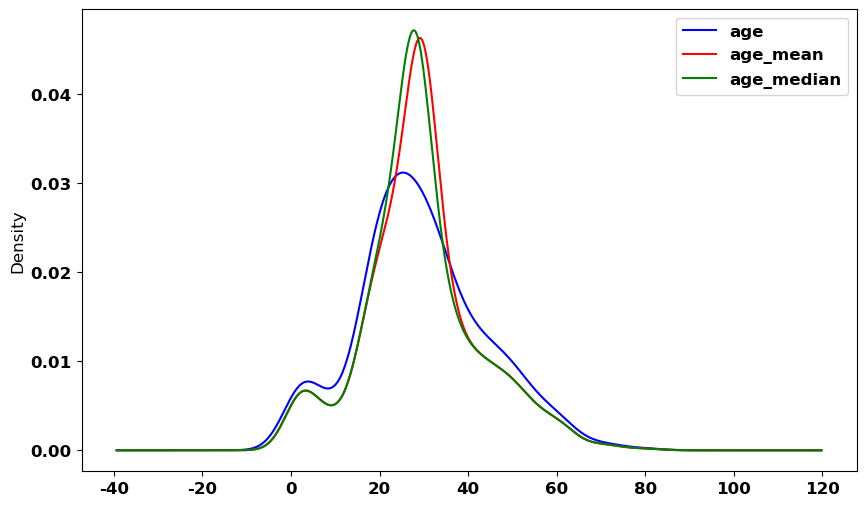

In [62]:
#분포 시각화
fig, ax = plt.subplots(figsize=(10,6))

x_tr['age'].plot(kind='kde',ax=ax, color='blue')
x_tr['age_mean'].plot(kind='kde',ax=ax, color='red')
x_tr['age_median'].plot(kind='kde',ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

raw data랑 차이가 꽤 많이 나는 것으로 보인다.<br>
 test data가 raw data를 예측하는 정확도가 떨어질 것이다.

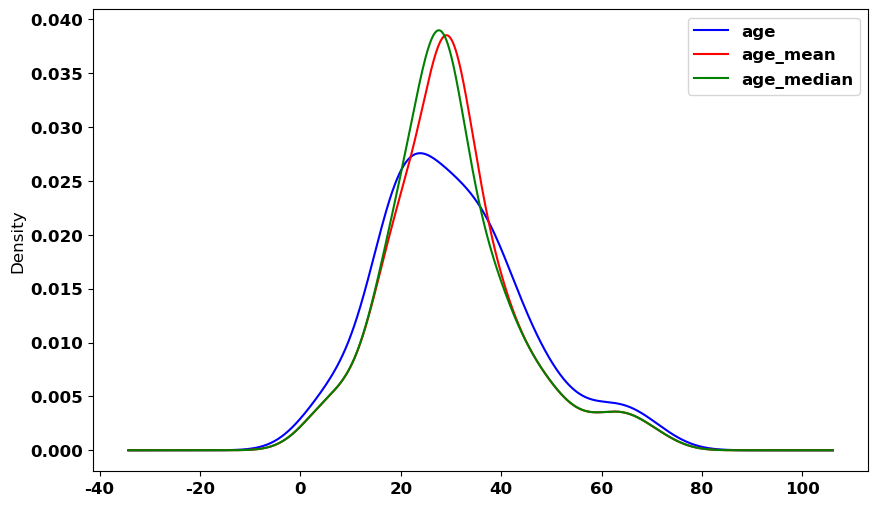

In [65]:
#test data에도 적용

x_te['age_mean'] = x_te['age'].fillna(x_tr['age'].mean())
x_te['age_median'] = x_te['age'].fillna(x_tr['age'].median())

# 분포 시각화
fig, ax = plt.subplots(figsize=(10,6))

x_te['age'].plot(kind='kde', ax=ax, color='blue')
x_te['age_mean'].plot(kind='kde', ax=ax, color='red')
x_te['age_median'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

랜덤값 치환


In [68]:
x_tr['age_random'] =x_tr['age']

#random sampling
random_sampling = (x_tr['age'].dropna().sample(x_tr['age'].isnull().sum()))  #train data의 결측치 개수만큼 train data에서 랜덤샘플링
random_sampling.index = x_tr[lambda x : x['age'].isnull()].index 

#NA imputation
x_tr.loc[x_tr['age'].isnull(),'age_random'] = random_sampling

#확인
x_tr[['age','age_random']].isnull().sum()

age           140
age_random      0
dtype: int64

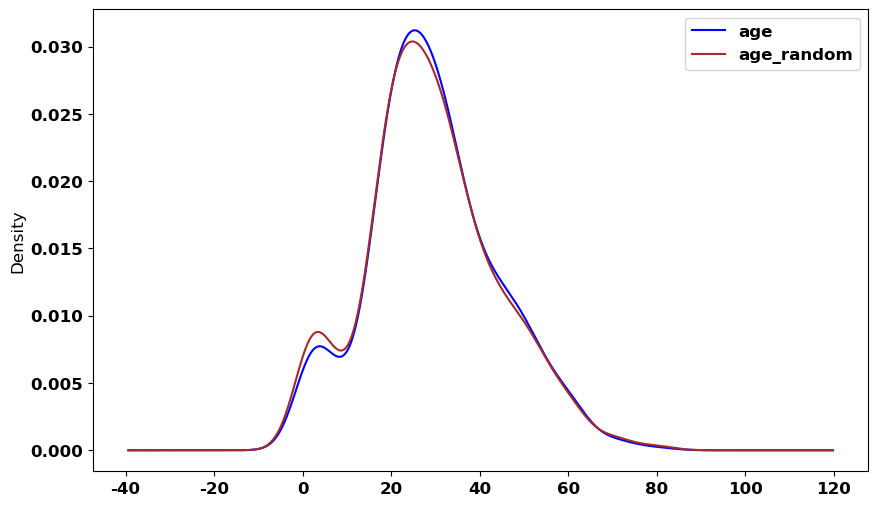

In [70]:
# 분포 시각화
fig, ax = plt.subplots(figsize=(10,6))

x_tr['age'].plot(kind='kde', ax=ax, color='blue')
x_tr['age_random'].plot(kind='kde', ax=ax, color='brown')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [71]:
#test data에도 적용

x_te['age_random'] =x_te['age']

#random sampling
random_sampling = (x_tr['age'].dropna().sample(x_te['age'].isnull().sum()))  #train data의 결측치 개수만큼 train data에서 랜덤샘플링
random_sampling.index = x_te[lambda x : x['age'].isnull()].index 

#NA imputation
x_te.loc[x_te['age'].isnull(),'age_random'] = random_sampling

#확인
x_te[['age','age_random']].isnull().sum()

age           37
age_random     0
dtype: int64

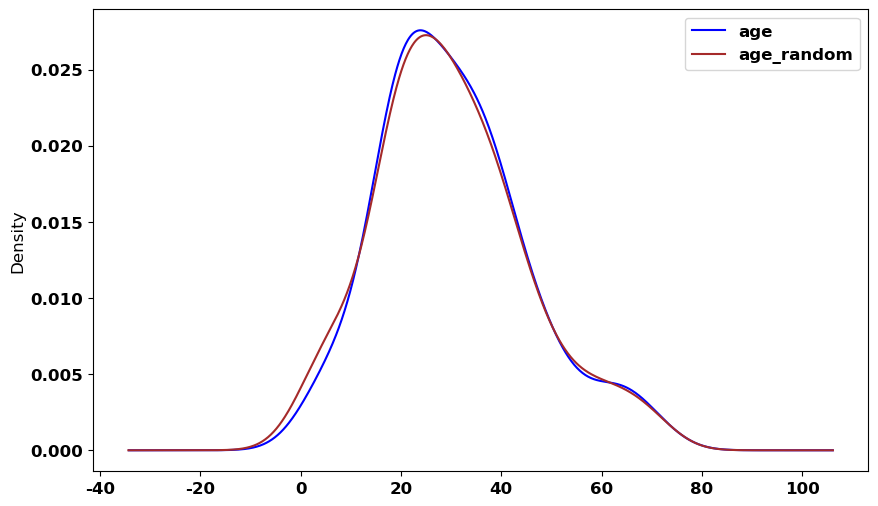

In [72]:
# 분포 시각화
fig, ax = plt.subplots(figsize=(10,6))

x_te['age'].plot(kind='kde', ax=ax, color='blue')
x_te['age_random'].plot(kind='kde', ax=ax, color='brown')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

위의 그래프를 보면 mean/median과 달리 random sample imputation의 경우 원래의 분산 및 분포를 보존한다는 장점을 확인할 수 있다.

##### 범주형 치환

최빈값 치환

In [76]:
#범주별 빈도 확인
x_tr['embarked'].value_counts(dropna=False)

S      525
C      125
Q       60
NaN      2
Name: embarked, dtype: int64

In [80]:
#embarked column의 최빈값
embarked_mode = x_tr['embarked'].mode().values[0]
embarked_mode

'S'

In [84]:
#NA impulation 
x_tr['embarked_filled'] = x_tr['embarked'].fillna(embarked_mode)
x_te['embarked_filled'] = x_te['embarked'].fillna(embarked_mode)

#확인
print(x_tr[['embarked','embarked_filled']].isnull().sum())
print(x_te[['embarked','embarked_filled']].isnull().sum())

embarked           2
embarked_filled    0
dtype: int64
embarked           0
embarked_filled    0
dtype: int64


#### sklearn 사용

##### simpleimputer - 치환

> 파라미터

- missing_values<br>default값은 np.nan으로 비어있는 값을 채우게 되고 필요시 다른 값을 빈값으로 인식하게 할 수 있다.
- strategy<br> 채울 값에 대한 함수; mean, median, most_frequent, constant(따로 지정한 값)
- fill_value<br> strategy의 값이 constant일 때, 여기에 정의된 값으로 채움

In [90]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

x_tr['age_simple_mean'] = imputer.fit_transform(x_tr[['age']]) #fit:학습 / transform : 치환
x_te['age_simple_mean'] = imputer.transform(x_te[['age']])     #학습 X, 치환만

x_tr[['age','age_simple_mean']].isnull().sum()

age                140
age_simple_mean      0
dtype: int64

##### KNNimputer

In [96]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors =5)

x_tr['age_knn'] = imputer.fit_transform(x_tr[['age']])
x_te['age_knn'] = imputer.transform(x_te[['age']])

print(x_tr[['age','age_knn']].isnull().sum())

age        140
age_knn      0
dtype: int64


##### iterativeImputer 

In [102]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=SEED)

x_tr['age_iter_none'] = imputer.fit_transform(x_tr[['age']])
x_te['age_iter_none'] = imputer.transform(x_te[['age']])

x_tr[['age', 'age_iter_none']].isnull().sum()

age              140
age_iter_none      0
dtype: int64

In [105]:
from sklearn.ensemble import RandomForestRegressor

imputer = IterativeImputer(estimator=RandomForestRegressor(verbose=0, random_state=SEED), 
max_iter=10, verbose=0, imputation_order='ascending', random_state=SEED)

x_tr['age_iter_none'] = imputer.fit_transform(x_tr[["age"]])    #fit 할 때는 train data
x_te['age_iter_none'] = imputer.transform(x_te[["age"]])        #transform 할 때는 test data

x_tr[['age', 'age_iter_none']].isnull().sum()

age              140
age_iter_none      0
dtype: int64

### 비대칭 데이터

In [106]:
# 왜도
df['fare'].skew()

4.787316519674893

In [107]:
#첨도
df['fare'].kurt()

33.39814088089868

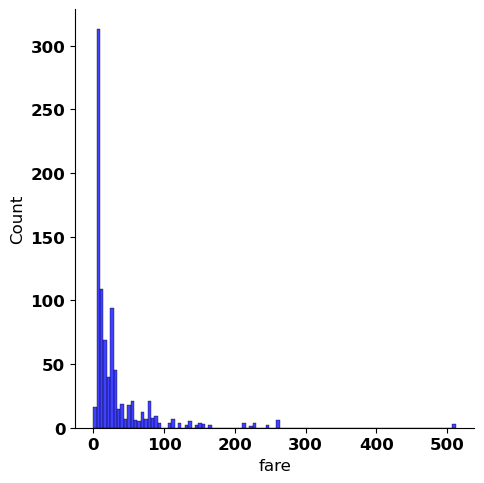

In [108]:
sns.displot(df['fare'], color = 'b', label ='Skewness : %.2f'%(df['fare'].skew()))

#### 비대칭 데이터 처리

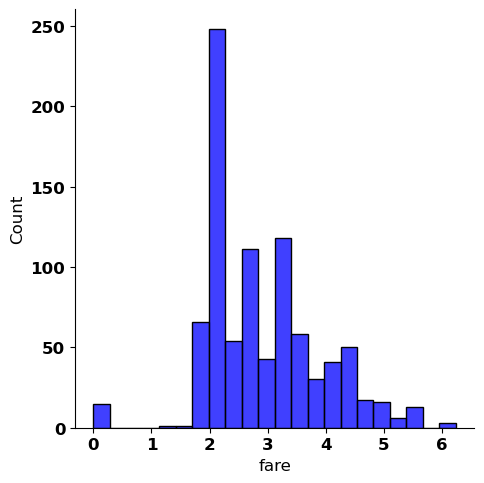

In [109]:
df['fare'] = df['fare'].map(lambda i : np.log(i) if i > 0 else 0) # log를 이용하여 비대칭 처리 -> 일반적으로 가장 많이 사용되는 방식이지만 
sns.displot(df["fare"], color="b", label="Skewness : %.2f"%(df["fare"].skew())) # 데이터를 변경하는 방식이라서 왜곡이 발생할 수 있어서 최대한 안쓰는 쪽으로 노력해보길


In [110]:
df['fare'].skew(), df['fare'].kurt()

(0.44310881405404506, 0.641225603709215)

### 이상치 

#### 이상치 확인

In [111]:
df['age'].skew() , df['age'].kurt()

(0.38910778230082704, 0.17827415364210353)

<AxesSubplot:ylabel='age'>

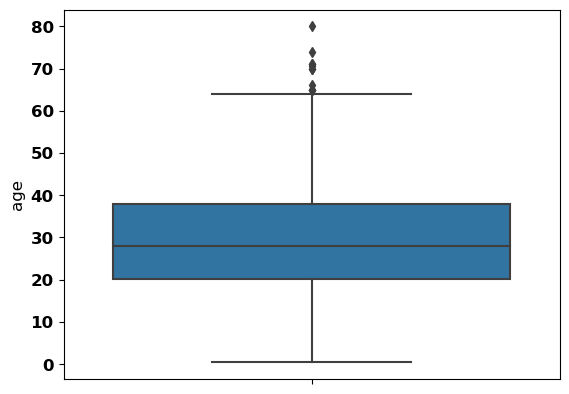

In [112]:
sns.boxplot(y=df['age'],data=df)

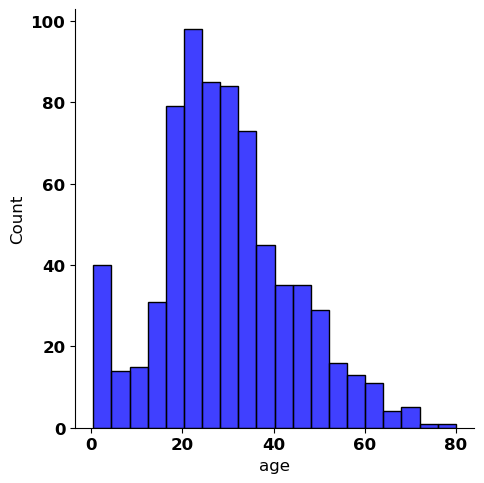

In [113]:
sns.displot(df['age'],color='b',label = "Skewness : %.2f"%(df["age"].skew()))

<AxesSubplot:xlabel='survived', ylabel='age'>

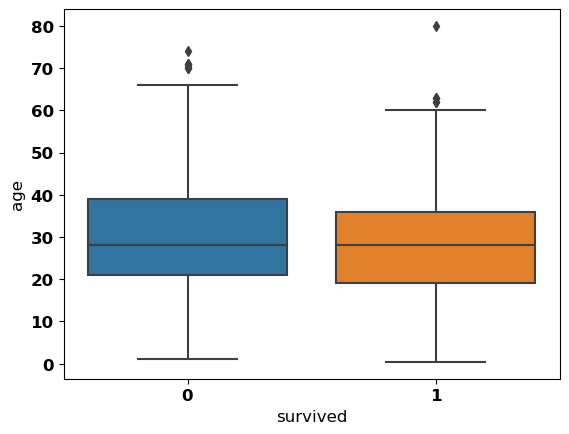

In [114]:
sns.boxplot(x=df['survived'],y=df['age'],data=df)

In [116]:
#분위수 계산
df.groupby(['survived'])['age'].quantile([0.25,0.75])

survived      
0         0.25    21.0
          0.75    39.0
1         0.25    19.0
          0.75    36.0
Name: age, dtype: float64

In [117]:
df['age'].quantile([0.25, 0.5, 0.75])

0.25    20.125
0.50    28.000
0.75    38.000
Name: age, dtype: float64

In [125]:
#boxplot
IQR = df['age'].quantile([0.25, 0.75]).values[1] - df['age'].quantile([0.25, 0.75]).values[0]

Upper_boundary = df['age'].quantile([0.25, 0.75]).values[1]  + 1.5*IQR #최대값
Lower_boundary = df['age'].quantile([0.25, 0.75]).values[0]  - 1.5*IQR #최소값

print('age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_boundary,upperboundary=Upper_boundary))

age outliers are values < -6.6875 or > 64.8125


In [126]:
cond1 = df['age'] > Upper_boundary   #최대값 이상의 이상치
cond2 = df['age'] < Lower_boundary   #최소값 이하의 이상치

cond = cond1 | cond2
outlier = df.loc[cond]  #이상치
print(outlier.shape, df.shape)

(11, 11) (891, 11)


In [127]:
outlier.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
33,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,2.351375,NaN,S
54,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,4.126799,B30,C
96,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,3.545419,A5,C
116,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,2.047693,NaN,Q
280,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,2.047693,NaN,Q


#### 이상치 처리

In [128]:
df['age'] = df['age'].map(lambda x : Upper_boundary if x > Upper_boundary else x)
df['age'] = df['age'].map(lambda x: Lower_boundary if x < Lower_boundary else x)

In [129]:
#이상치 제거 확인

cond1 = df['age'] > Upper_boundary
cond2 = df['age'] < Lower_boundary

cond = cond1 | cond2
outlier = df.loc[cond]
print(outlier.shape, df.shape)
outlier.head()

(0, 11) (891, 11)


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked


<AxesSubplot:ylabel='age'>

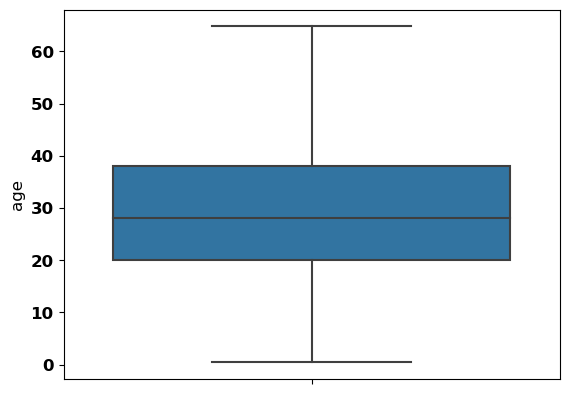

In [130]:
sns.boxplot(y=df['age'], data=df)

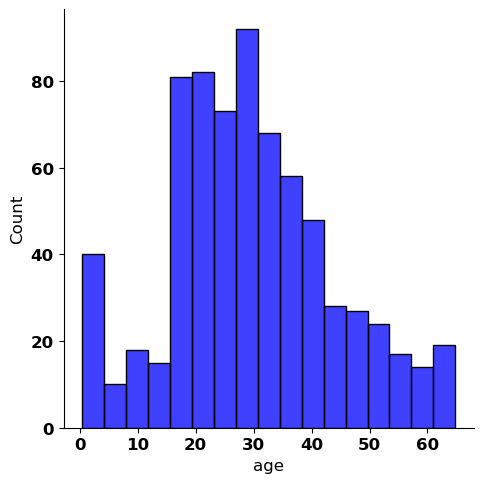

In [131]:
sns.displot(df["age"], color="b", label="Skewness : %.2f"%(df["age"].skew()))

<AxesSubplot:xlabel='survived', ylabel='age'>

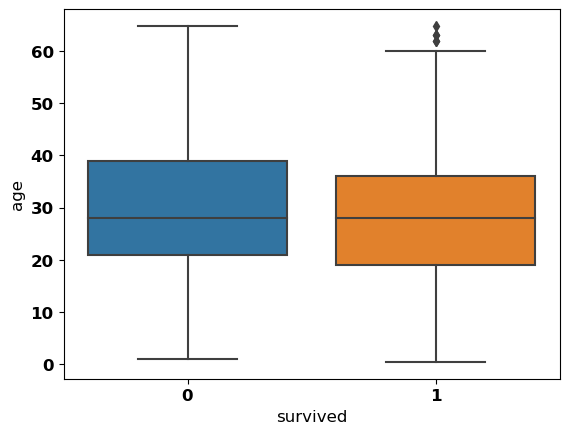

In [133]:
sns.boxplot(x=df['survived'], y=df['age'], data=df)